In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import empty


In [8]:
Db = lambda l:3e2*l/3
a=5/3
l = 1.12*a #fitted value 
z0 = 3.25*a
nu = 0.418

#Let's calculate  adjusted values
k =  2*np.pi*(nu/(a))

kl = k*l/4.1
l_adjusted = kl/k
Db1 = Db(l_adjusted)
adjusted_xi = 6*l_adjusted*(k*l_adjusted)**2/(1-(k*l_adjusted)**4)

In [9]:
adjusted_xi

1.9129206595710377

In [10]:
kl

0.717447813026633

In [11]:
#Anderson
def alpha_star(Db,xi,L):
    return (Db/xi**2)*np.exp(-L/xi)

def trans_t(t,alpha,z0,L,D,td=1,p=0.5,s=0.85): 
    
    A = ((L+2*z0)**2/np.pi**2)
   

    B = (alpha*td)**(s+1)*np.exp(-alpha*t+1)*(t*alpha)**-(p+1)

    return B**(D*td/A)

8.90298151451654


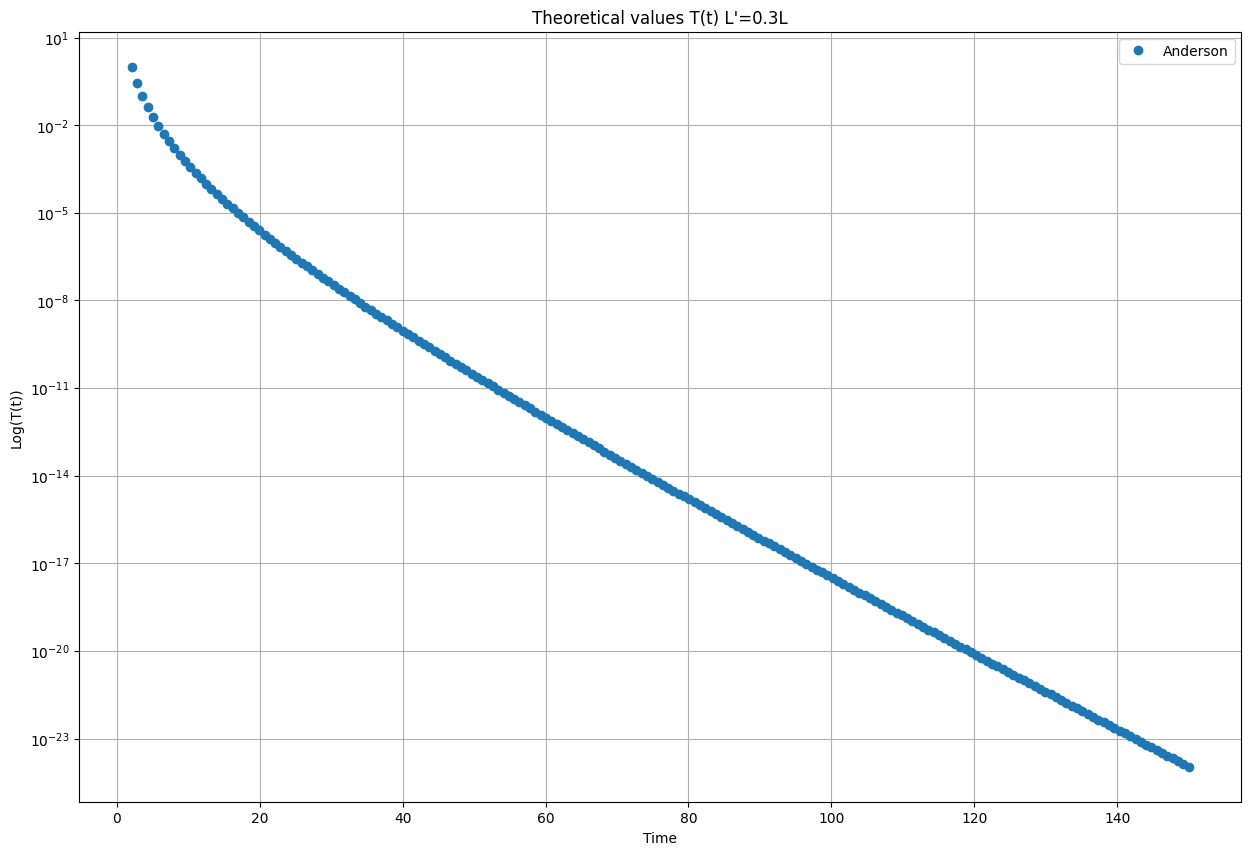

In [12]:
times = np.linspace(2.1,150,200)
for i in  np.array([0.3]):
    plt.figure(figsize=(15, 10))
    L = i*18.01*a
    alpha = alpha_star(Db1,adjusted_xi,L)
    print(1/alpha)
    transmission_anderson = [trans_t(t,alpha,z0,L,Db1,2.1) for t in times]
    #transmission_diffusive = Db1/(np.pi*L**2)*((np.pi*L/(L+2*z0))**2)*np.sin(np.pi*L/(L+2*z0))*(np.exp(-(times)*np.pi**2*Db1/(L + 2*z0)**2))
    transmission_diffusive = (np.exp(-(times)*(Db1)*(np.pi**2)/(L + 2*z0)**2))
    plt.plot(times,(transmission_anderson/np.max(transmission_anderson)),"o", label=f"Anderson")
    #plt.plot(times,(transmission_diffusive/np.max(transmission_diffusive)),"o", label=f"Diffusive")
    plt.ylabel("Log(T(t))")
    plt.xlabel("Time")
    plt.title(f"Theoretical values T(t) L'={i}L")
    plt.legend()
    plt.yscale("log")
    plt.grid()
    plt.show()
    
